# the loess fit in R

In this lesson, we will briefly describe how to fit the loess model in R.

For visualization purposes, `ggplot` makes fitting and visualizing loess very easy, by adding on the `geom_smooth()` function to a scatter plot. Let's see this on our simulated data. As in an earlier lesson, we'll create a data frame, with a predictor, $x$, as realizations from a $U(0,\pi/2)$, and let $Y = \sin(\pi x) + \varepsilon$, where $\varepsilon \overset{iid}{\sim} N(0,0.5^2)$.

In [9]:
library(ggplot2)

#simulate the data
set.seed(88888)
n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4

df = data.frame(x = x, y = y)
head(df)

x,y
0.3760199,5.763870
0.9016790,4.300436
1.2164907,3.843510
1.3107582,2.465646
0.4385922,5.737440
1.0267308,4.600813


Saving 7 x 7 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Saving 7 x 7 in image


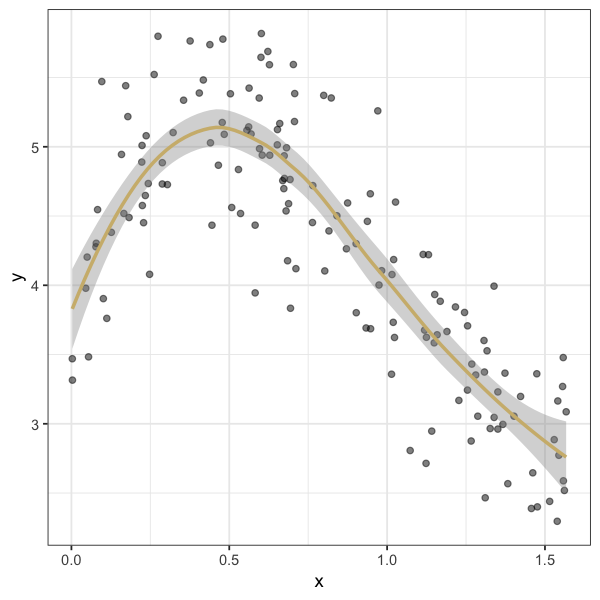

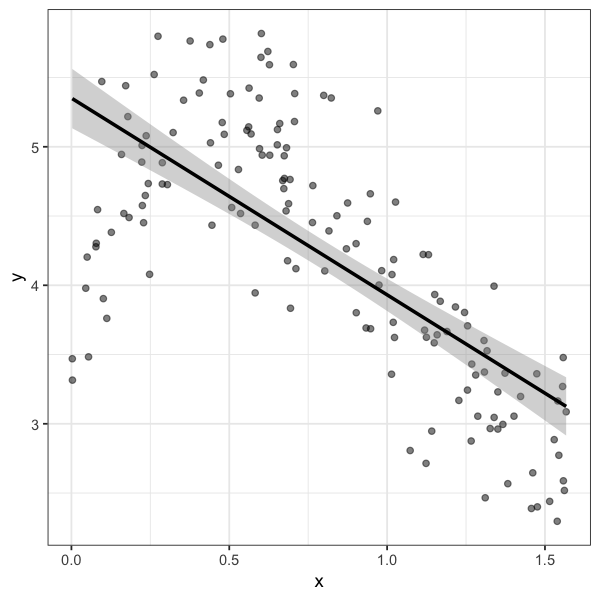

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(col = "#CFB87C") + 
    theme_bw() + 
    ggsave("~/CU Google Drive/loess.pdf")

options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm", col = "black") +
    theme_bw() + 
    ggsave("~/CU Google Drive/loess.pdf")

Note that the loess captures the systematic variability in the data much better than linear regression does. 

For prediction purposes, rather than visualization purposes, we can use the `loess()` function. This function fits the loess model, much like `lm()` fits a linear regression model. Once we fit the model, we can use the `predict()` function to make predictions.

Let's first fit a loess model to the simulated data, specify a few $x$ points to make predictions, and then predict at those points!

In [29]:
l = loess(y ~ x, data = df)
newdata = seq(0.1,0.75, length.out = 4)
p = predict(l, newdata, se = T)
cat("Here are the predicted values: ", p$fit, ".")

Here are the predicted values:  4.327202 5.005175 5.105046 4.74764 .

Here, notice that we've set `se = T`, so that we also obtain the standard errors associated with the model. This is helpful in producing confidence intervals, for example, `p$se` and `p$df` returns the standard error and the estimated degrees of freedom of the loess model, which we can use to construct t-intervals:

In [30]:
p
ce = cbind(p$fit - qt(0.975,p$df)*p$se, p$fit + qt(0.975,p$df)*p$se)

cat(" Here are the confidence intervals associated with predictions at the new data:")
ce

$fit
[1] 4.327202 5.005175 5.105046 4.747640

$se.fit
[1] 0.09664972 0.06391149 0.06555546 0.06581142

$residual.scale
[1] 0.453407

$df
[1] 145.1269

 Here are the prediction intervals associated with predictions at the new data:

4.136180,4.518225
4.878858,5.131493
4.975479,5.234612
4.617567,4.877712


Recall that prediction intervals are different from confidence intervals, and require a different standard error calculation. The `predict()` function does not calculate prediction standard errors. 

#### The bone density data

Of course, it would be nice to see how loess does on real data. The bone data (in the ElemStatLearn) package has 485 observations on the following 4 variables:

1. idnum: identifies the child, and hence the repeat measurements

2. age: average of age at two visits

3. gender: a factor with levels female male

4. spnbmd: Relative spinal bone mineral density measurement

For simplicity, let's consider modeling age against relative spinal bone mineral density. An exploratory plot shows that the relationship doesn't look quite linear, and the `ggplot` loess fit captures that nonlinearity. 

idnum,age,gender,spnbmd
1,11.70,male,0.018080670
1,12.70,male,0.060109290
1,13.75,male,0.005857545
2,13.25,male,0.010263930
2,14.30,male,0.210526300
2,15.30,male,0.040843210


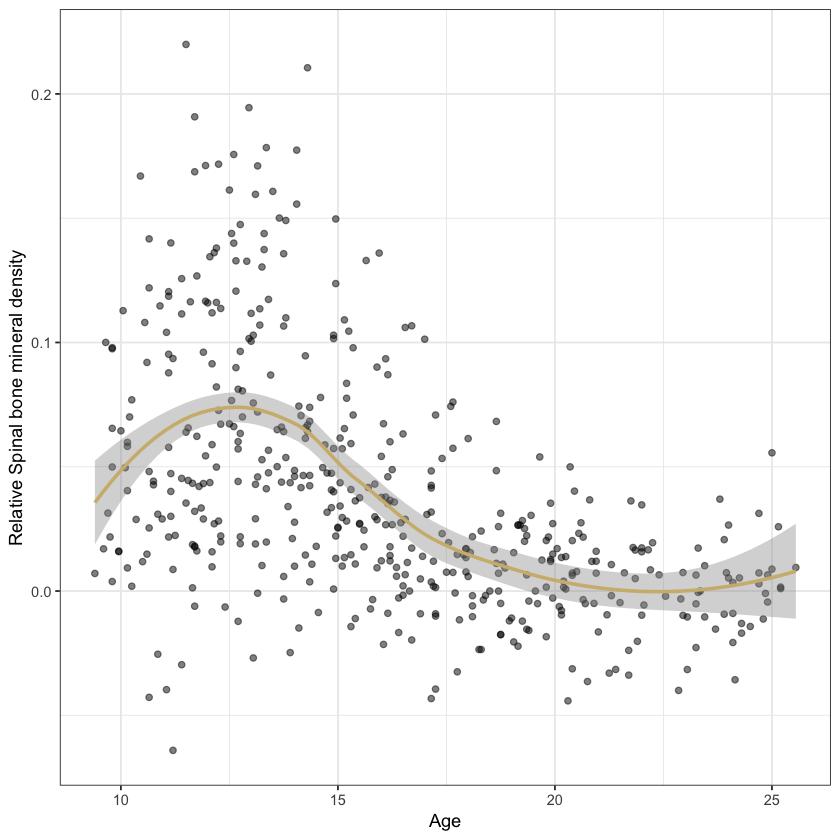

In [3]:
library(ggplot2)
library(ElemStatLearn)
head(bone)

ggplot(bone, aes(age, spnbmd)) + 
    geom_point(color = "black", alpha = 0.5) + 
    geom_smooth(method = "loess", color = "#CFB87C") +
    theme_bw() + 
    xlab("Age") + 
    ylab("Relative Spinal bone mineral density")

In terms of a visual assessment, this fit looks good! We can also use the `loess()` function to make predictions:

In [5]:
loess_bone = loess(spnbmd ~ age, data = bone)
newdata = seq(10,25, length.out = 4)
predict(loess_bone, newdata)

[1] 0.048529324 0.051729369 0.004316834 0.005381914